In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

from sklearn.preprocessing import LabelEncoder

from models.mlp import BlackBoxModel
from models.rbf import RBFNet
from models.svm import LinearSVM
from utils.datasets import dataset_loader

pd.set_option('display.max_columns', None)

%reload_ext autoreload
%autoreload 2

In [191]:
def bold(string):
    return "\033[1m" + string + "\033[0m"

In [192]:
name = 'heloc'
dropped_features = []#UCIDatasets().continuous_features[dataset]
dataset = dataset_loader(name, dropped_features=dropped_features, n_bins=None)

In [193]:
dataset.data

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55.0,144.0,4,84,20,3,0,83,2.0,3,5,23,1,43,0.0,0,0,33.0,74.0,8.0,1.0,1.0,69.0,0
1,61.0,58.0,15,41,2,4,4,100,15.0,0,8,7,0,67,0.0,0,0,0.0,74.0,0.0,2.0,1.0,0.0,0
2,67.0,66.0,5,24,9,0,0,100,15.0,7,8,9,4,44,0.0,4,4,53.0,66.0,4.0,2.0,1.0,86.0,0
3,66.0,169.0,1,73,28,1,1,93,76.0,6,6,30,3,57,0.0,5,4,72.0,83.0,6.0,4.0,3.0,91.0,0
4,81.0,333.0,27,132,12,0,0,100,15.0,7,8,12,0,25,0.0,1,1,51.0,89.0,3.0,1.0,0.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73.0,131.0,5,57,21,0,0,95,80.0,6,6,21,5,19,7.0,0,0,26.0,74.0,5.0,2.0,0.0,100.0,1
10455,65.0,147.0,39,68,11,0,0,92,28.0,6,6,12,0,42,1.0,1,1,86.0,53.0,2.0,2.0,1.0,80.0,0
10456,74.0,129.0,6,64,18,1,1,100,15.0,6,8,18,1,33,3.0,4,4,6.0,74.0,5.0,2.0,0.0,56.0,0
10457,72.0,234.0,12,113,42,2,2,96,35.0,6,2,45,0,20,6.0,0,0,19.0,74.0,4.0,1.0,0.0,38.0,0


In [194]:
X_train, y_train, X_test, y_test, mean, std = dataset.get_split(normalise=False, shuffle=False,
                                                                     return_mean_std=True)
prop1s = round(np.average(y_train)*100, 2)
print(bold("Proportion of 1s in Training Data:") + " {}%".format(prop1s))

Proportion of 1s in Training Data: 47.19%


In [195]:
X = pd.DataFrame(X_train)
X.columns = dataset.features[:-1]
X_train = pd.DataFrame(X_train)
X_train.columns = dataset.features[:-1]
X_test = pd.DataFrame(X_test)
X_test.columns = dataset.features[:-1]
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
print(bold("Dataset:") + " {}\n".format(name.replace('_', ' ').title()))
X

Dataset: Heloc



,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,3.0,5.0,23.0,1.0,43.0,0.0,0.0,0.0,33.0,74.0,8.0,1.0,1.0,69.0
1,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,15.0,0.0,8.0,7.0,0.0,67.0,0.0,0.0,0.0,0.0,74.0,0.0,2.0,1.0,0.0
2,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,15.0,7.0,8.0,9.0,4.0,44.0,0.0,4.0,4.0,53.0,66.0,4.0,2.0,1.0,86.0
3,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,6.0,6.0,30.0,3.0,57.0,0.0,5.0,4.0,72.0,83.0,6.0,4.0,3.0,91.0
4,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,15.0,7.0,8.0,12.0,0.0,25.0,0.0,1.0,1.0,51.0,89.0,3.0,1.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,68.0,182.0,19.0,94.0,19.0,0.0,0.0,90.0,2.0,4.0,6.0,20.0,0.0,40.0,0.0,3.0,3.0,5.0,48.0,3.0,3.0,0.0,55.0
7892,57.0,107.0,3.0,53.0,25.0,1.0,1.0,96.0,15.0,6.0,3.0,26.0,4.0,54.0,0.0,7.0,7.0,89.0,36.0,5.0,3.0,2.0,82.0
7893,65.0,94.0,6.0,43.0,31.0,2.0,1.0,91.0,38.0,6.0,5.0,36.0,5.0,42.0,0.0,0.0,0.0,18.0,88.0,5.0,3.0,0.0,50.0
7894,75.0,293.0,9.0,143.0,9.0,0.0,0.0,89.0,11.0,4.0,6.0,9.0,2.0,22.0,0.0,0.0,0.0,59.0,78.0,3.0,1.0,1.0,57.0


In [196]:
# B_name = 'dnn'  # 'lr' or 'dnn' or 'xgb'
# if B_name == 'dnn':
#     from models.models_global_ce import dnn_normalisers as normalisers
# elif B_name == 'lr':
#     from models.models_global_ce import lr_normalisers as normalisers
# else:  # no xgb normalisation
#     normalisers = {name: False}
# normalise = [mean, std] if normalisers[name] else None

In [197]:
# import pickle
# with open('data/models_global_ce/{}_{}.pkl'.format(name, B_name), 'rb') as f:
#     B = pickle.load(f)

In [198]:
# print(bold("Dataset:") + " {}".format(name.replace('_', ' ').title()))
# print(bold("Model:") + " {}\n".format(B_name.replace('_', ' ').upper()))
# performance(B, x_train, x_test, y_train, y_test, normalise=normalise)

In [199]:
target_name = 'RiskPerformance'

In [200]:
seed = 42

np.random.seed(seed)  # for reproducibility


std = X_train.std()
mean = X_train.mean()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Initialize the model, loss function, and optimizer
# model = BlackBoxModel(input_dim=X_train.shape[1])
# model = RBFNet(input_dim=X_train.shape[1], hidden_dim=X_train.shape[1])
model = LinearSVM(input_dim=X_train.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)

    # Convert outputs to binary using 0.5 as threshold
    y_pred_tensor = (test_outputs > 0.5).float()
    correct_predictions = (y_pred_tensor == y_test_tensor).float().sum()
    accuracy = correct_predictions / y_test_tensor.shape[0]

accuracy.item()

0.7493671178817749

In [201]:
sample_num = 100
# indice = (X_test.sample(sample_num)).index

# Fixing the indice for test purpose
indice = pd.Int64Index([1825, 1735,  678,  351, 1791,  610,   70, 1124,   56,  900,  555,
             746, 1704,  462, 1873,  289,  593,  824,  530, 1424, 1063,  486,
             892,  554,  777, 1234, 1216,  374,  439, 1271,  651,  211,  886,
            1329, 1005, 1102, 1052,  111,  344,  305, 1376,  931, 1041, 1010,
            1640,  316,  432,  353,  426,  394, 1360, 1131,   99,  859, 1270,
             237, 1465,  710, 1653,  538,  382, 1830, 1632, 1314, 1781, 1494,
            1831, 1721,   69, 1788, 1546, 1753, 1931,  429, 1436, 1755,  251,
             756,  855,  128,  637,  864, 1809, 1402,  361, 1578, 1091, 1810,
            1615, 1138,  247,  845, 1628, 1239,  196, 1033,  584,  548,  722,
            1840],
           dtype='int64')

X_test = pd.DataFrame(X_test, columns=X.columns)
df_explain = X_test.loc[indice]

# y_target = torch.distributions.beta.Beta(0.1, 0.9).sample((sample_num,))
y_test = pd.Series(y_test.reshape(-1))
y_true = y_test.loc[indice]

y = model(torch.FloatTensor(df_explain.values))

C:\Users\leiyo\AppData\Local\Temp\ipykernel_40556\957672971.py:5: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  indice = pd.Int64Index([1825, 1735,  678,  351, 1791,  610,   70, 1124,   56,  900,  555,


## GLOBE_CE

In [202]:
from explainers.globe_ce import GLOBE_CE

In [203]:
normalise = None

# AReS initiated to determine bin widths for costs
from explainers.ares import AReS
ares = AReS(model=model, dataset=dataset, X=dataset.data.drop(target_name,axis=1), n_bins=10, normalise=normalise)  # 1MB
bin_widths = ares.bin_widths

In [204]:
# example of ordinal features usage
ordinal_features = ['Present-Employment'] if name == 'german_credit' else []
# initialise GLOBE_CE
globe_ce = GLOBE_CE(model=model, dataset=dataset, X=df_explain, affected_subgroup=None,
                    dropped_features=dropped_features, ordinal_features=ordinal_features, delta_init='zeros',
                    normalise=normalise, bin_widths=bin_widths, monotonicity=None, p=1)

100%|██████████| 100/100 [00:00<00:00, 4287.82it/s]


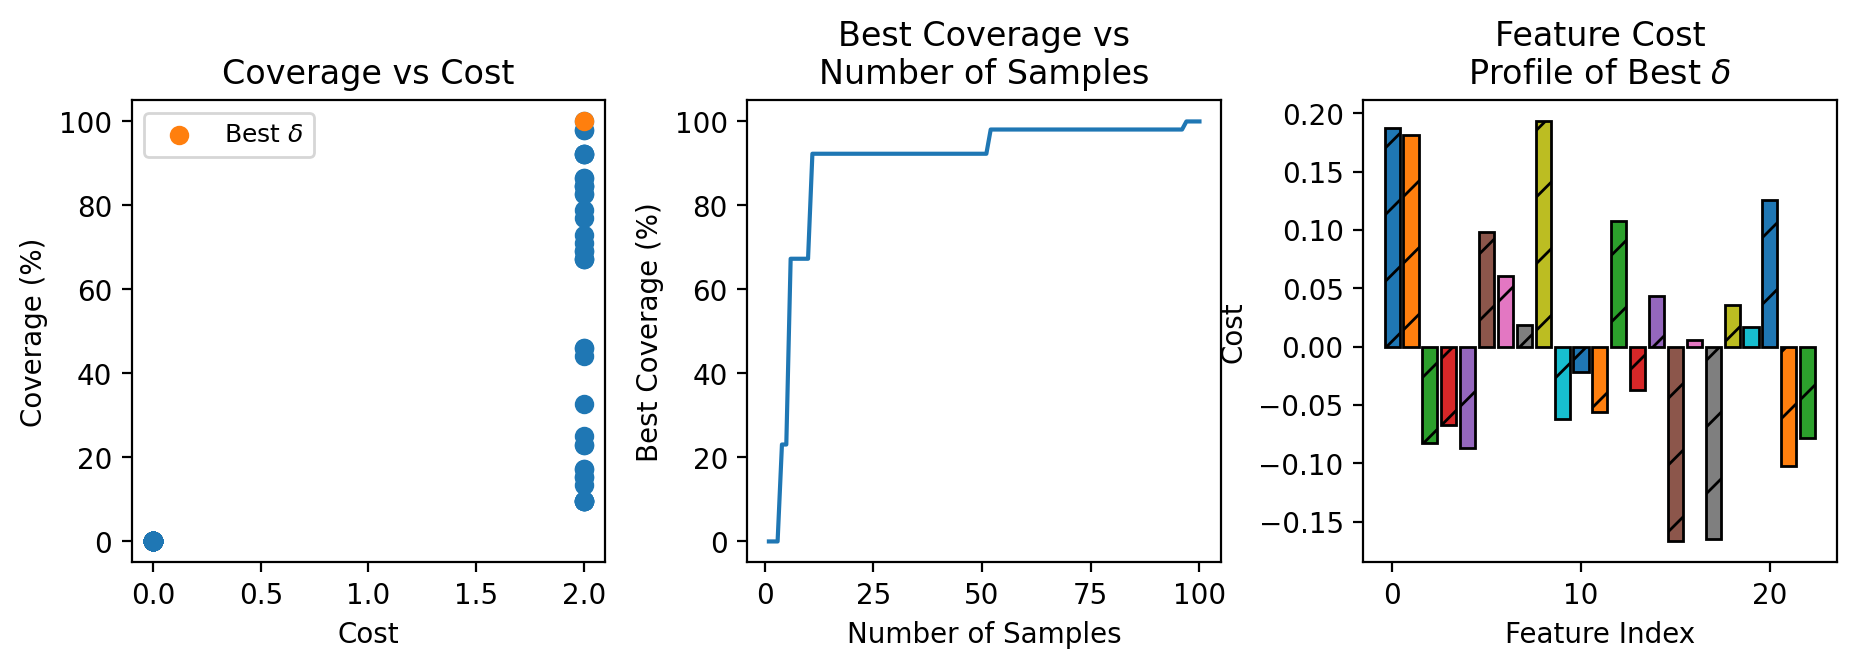

In [205]:
globe_ce.sample(n_sample=sample_num, magnitude=2, sparsity_power=1,  # magnitude is the fixed cost sampled at
                idxs=None, n_features=df_explain.shape[1], disable_tqdm=False,  # 2 random features chosen at each sample, no sparsity smoothing (p=1)
                plot=True, seed=0, scheme='random', dropped_features=dropped_features)
delta = globe_ce.best_delta  # pick best delta
globe_ce.select_n_deltas(n_div=3)

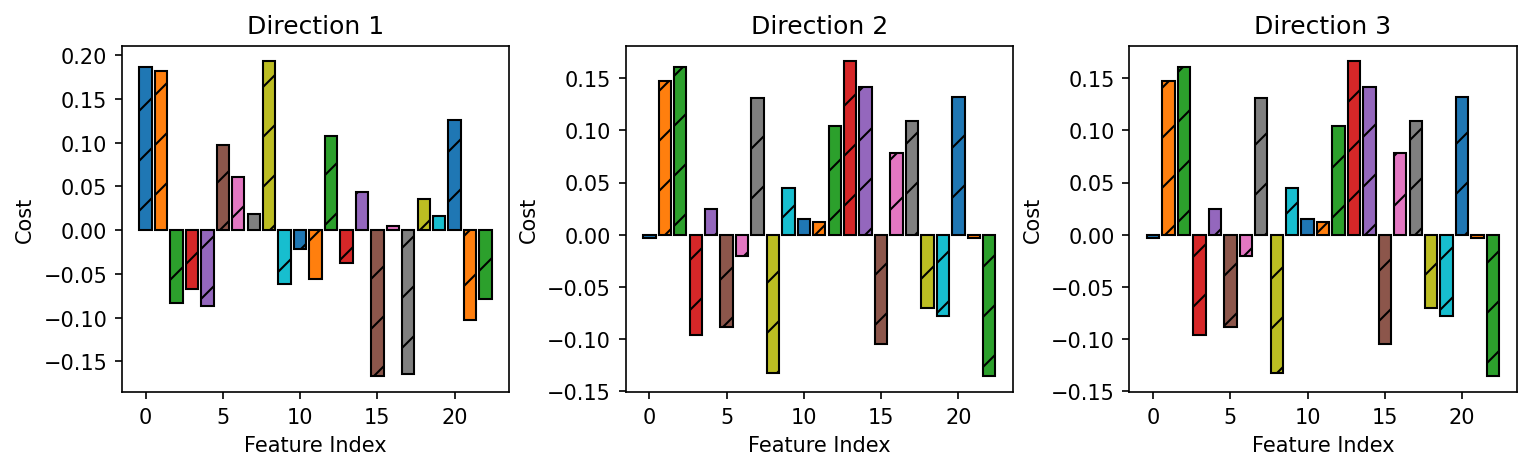

In [206]:
fig, ax = plt.subplots(nrows=1, ncols=globe_ce.deltas_div.shape[0], dpi=150)
fig.set_figwidth(12)
fig.set_figheight(3)
plt.subplots_adjust(wspace=0.3)
for i in range(globe_ce.deltas_div.shape[0]):
    delta_cost = globe_ce.deltas_div[i] * globe_ce.feature_costs_vector
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    j, k = 0, 0
    for feature in globe_ce.features_tree:
        if not globe_ce.features_tree[feature]:
            ax[i].bar(range(j, j+1), delta_cost[j], hatch='/',
                        linewidth=1, edgecolor='black', color=cycle[k%len(cycle)])
            j += 1
            k += 1
        else:
            feature_values = globe_ce.features_tree[feature]
            n_f = len(feature_values)
            ax[2].bar(range(j, j+n_f), delta_cost[j:j+n_f], color=cycle[k%len(cycle)])
            j += n_f
            k += 1
    ax[i].set_title(f'Direction {i+1}')
    ax[i].set_xlabel('Feature Index')
    ax[i].set_ylabel('Cost')
plt.show()

In [207]:
n_div = globe_ce.deltas_div.shape[0]
min_costs = np.zeros((n_div, globe_ce.x_aff.shape[0]))
min_costs_idxs = np.zeros((n_div, globe_ce.x_aff.shape[0]))
for i in range(n_div):  # Algorithm 1, Line 2
    cor_s, cos_s, k_s = globe_ce.scale(globe_ce.deltas_div[i], disable_tqdm=False, vector=True)  # Algorithm 1, Line 3
    min_costs[i], min_costs_idxs[i] = globe_ce.min_scalar_costs(cos_s, return_idxs=True, inf=True)  # Implicitly computes Algorithm 1, Lines 4-6, returning minimum costs per input and their indices in the k vector
    max_scalar_idxs = globe_ce.cluster_by_costs(cos_s, n_bins=5)
min_costs = min_costs.min(axis=0)

100%|██████████| 1000/1000 [00:00<00:00, 9604.57it/s]


Unable to find recourse for 0/52 inputs


100%|██████████| 1000/1000 [00:00<00:00, 11119.28it/s]


Unable to find recourse for 52/52 inputs


100%|██████████| 1000/1000 [00:00<00:00, 8898.10it/s]

Unable to find recourse for 52/52 inputs


In [208]:
ces = globe_ce.round_categorical(globe_ce.x_aff+globe_ce.best_delta) if globe_ce.n_categorical else globe_ce.x_aff+globe_ce.best_delta
counterfactual_X_global_ce = pd.DataFrame(ces, columns=X_test.columns)
counterfactual_y_global_ce = model.predict(counterfactual_X_global_ce.values)

In [209]:
print('Coverage (Globe CE):', counterfactual_y_global_ce.sum()/len(counterfactual_y_global_ce))

Coverage (Globe CE): 1.0


In [210]:
factual_X = pd.DataFrame(globe_ce.x_aff, columns=df_explain.columns)
factual_y = model.predict(factual_X.values)

In [211]:
y_target = torch.ones(factual_X.shape[0])

In [212]:
costs_vector = globe_ce.feature_costs_vector

## AReS

In [213]:
# AReS initiated to determine bin widths for costs
from explainers.ares import AReS
ares = AReS(model=model, dataset=dataset, X=factual_X, n_bins=10, normalise=normalise)  # 1MB

C:\Users\leiyo\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Computing Candidate Sets of Conjunctions of Predicates SD and RL
Processing 168 combinations | Sampling itemset size 65
SD and RL Computed with Lengths 287 and 287
Computing Ground Set of Triples V
Reducing RL
RL Reduced from Size 287 to 72


100%|██████████| 287/287 [00:00<00:00, 1284.56it/s]


Ground Set Computed with Length 15288


4999it [00:08, 558.79it/s]


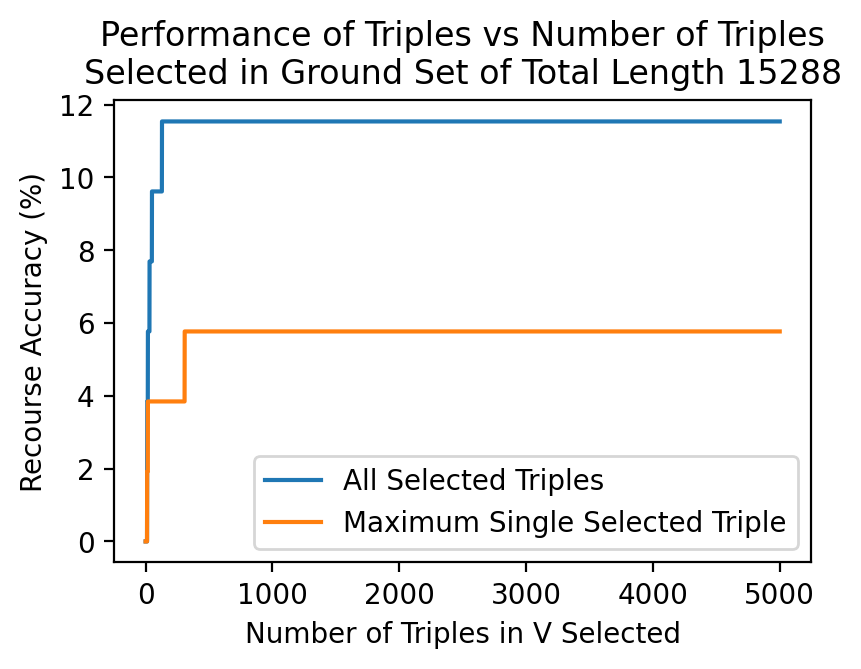

Candidate Set Filtered with Length: 5000
Initialising Copy of Ground Set
While there exists a delete/update operation, loop:
Checking Delete
Checking Add


100%|██████████| 4999/4999 [00:00<00:00, 12929.47it/s]


Checking Exchange


100%|██████████| 4997/4997 [00:01<00:00, 4098.21it/s]


Checking Delete
Checking Add


100%|██████████| 4997/4997 [00:00<00:00, 13234.08it/s]
2it [00:00, 510.85it/s]


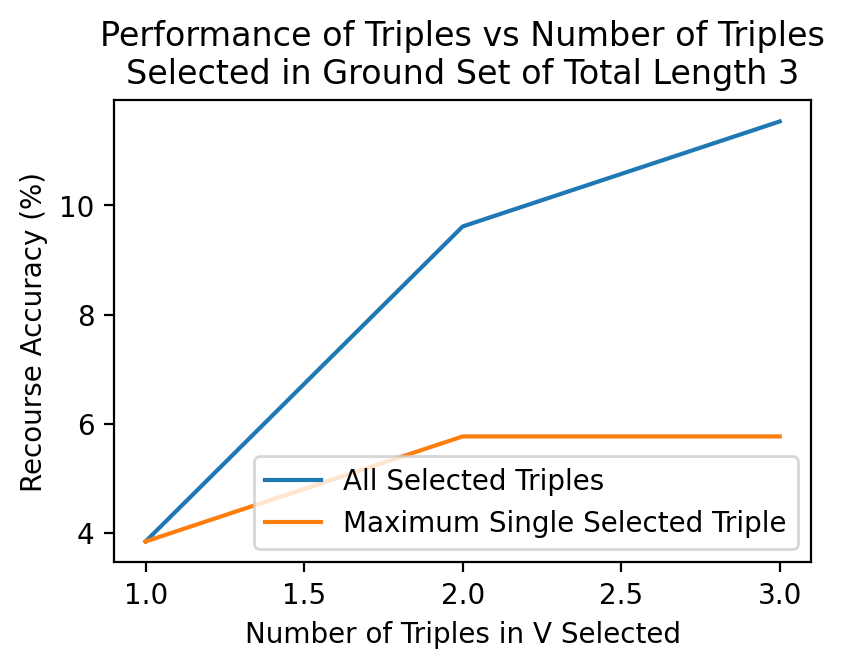

In [214]:
ares.generate_itemsets(apriori_threshold=0.2, max_width=None, # defaults to e2-1
                       affected_subgroup=None, save_copy=False)
# Note: progress bar initial time estimate about 10 times too large
ares.generate_groundset(max_width=None, RL_reduction=True,
                        then_generation=None, save_copy=False)
lams = [1, 0]  # can play around with these lambda values
ares.evaluate_groundset(lams=lams, r=5000, save_mode=1,
                        disable_tqdm=False, plot_accuracy=True)
ares.select_groundset(s=5000)
ares.optimise_groundset(lams=lams, factor=1, print_updates=False,
                        print_terms=False)

In [215]:
counterfactual_X_ares = pd.DataFrame(ares.R.cfx_matrix[0], columns=X_test.columns)
counterfactual_y_ares = model.predict(counterfactual_X_ares.values)

In [216]:
print('Coverage (AReS):', counterfactual_y_ares.sum()/len(counterfactual_y_ares))

Coverage (AReS): 0.038461538461538464


## Diverse Counterfactual Explanation (DiCE)

In [217]:
backend = 'PYT'  # needs pytorch installed

In [218]:
import dice_ml

m = dice_ml.Model(model=model, backend='PYT')

factual_X_ext = factual_X.copy()
factual_X_ext[target_name] = factual_y

dice_features = factual_X.columns.to_list()

d = dice_ml.Data(dataframe=factual_X_ext, continuous_features=dice_features, outcome_name = target_name)

dice_explainer = dice_ml.Dice(d, m, method="gradient")

In [219]:
import os 
import pickle 
dump_data_path = './data/baseline/'
with open(os.path.join(dump_data_path, f"dice_results_{model.name}_heloc.pkl"), 'rb') as file:
    dice_results = pickle.load(file)

In [34]:
dice_results = dice_explainer.generate_counterfactuals(query_instances=factual_X, features_to_vary=dice_features, desired_class="opposite", total_CFs=1)

  2%|▏         | 1/52 [01:07<57:06, 67.19s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


  4%|▍         | 2/52 [02:44<1:10:38, 84.77s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


  6%|▌         | 3/52 [04:28<1:16:33, 93.75s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


  8%|▊         | 4/52 [06:19<1:20:21, 100.45s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 10%|▉         | 5/52 [08:09<1:21:19, 103.82s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec


 12%|█▏        | 6/52 [09:22<1:11:33, 93.34s/it] WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 13%|█▎        | 7/52 [10:23<1:02:07, 82.84s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 15%|█▌        | 8/52 [11:34<58:05, 79.22s/it]  WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 17%|█▋        | 9/52 [13:10<1:00:28, 84.39s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 19%|█▉        | 10/52 [16:05<1:18:32, 112.21s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 21%|██        | 11/52 [17:33<1:11:37, 104.82s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 23%|██▎       | 12/52 [19:00<1:06:14, 99.35s/it] WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 25%|██▌       | 13/52 [20:38<1:04:24, 99.09s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 27%|██▋       | 14/52 [22:47<1:08:27, 108.10s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 29%|██▉       | 15/52 [25:36<1:18:02, 126.54s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 03 sec


 31%|███       | 16/52 [27:08<1:09:38, 116.06s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 33%|███▎      | 17/52 [28:24<1:00:36, 103.90s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 03 sec


 35%|███▍      | 18/52 [28:47<45:08, 79.68s/it]   WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 37%|███▋      | 19/52 [29:56<42:02, 76.45s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 38%|███▊      | 20/52 [30:54<37:47, 70.85s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 40%|████      | 21/52 [32:55<44:30, 86.15s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 42%|████▏     | 22/52 [34:32<44:41, 89.37s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 44%|████▍     | 23/52 [36:40<48:49, 101.01s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 46%|████▌     | 24/52 [38:15<46:15, 99.13s/it] WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 48%|████▊     | 25/52 [40:14<47:18, 105.13s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 50%|█████     | 26/52 [42:26<48:58, 113.03s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 52%|█████▏    | 27/52 [44:49<50:50, 122.03s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 54%|█████▍    | 28/52 [48:31<1:00:52, 152.18s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 56%|█████▌    | 29/52 [50:17<53:01, 138.33s/it]  WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 58%|█████▊    | 30/52 [53:24<56:02, 152.82s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 60%|█████▉    | 31/52 [55:18<49:23, 141.12s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 62%|██████▏   | 32/52 [56:21<39:14, 117.73s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 63%|██████▎   | 33/52 [57:58<35:20, 111.60s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 65%|██████▌   | 34/52 [58:52<28:15, 94.18s/it] WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 67%|██████▋   | 35/52 [1:01:26<31:49, 112.32s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 69%|██████▉   | 36/52 [1:03:54<32:43, 122.75s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 71%|███████   | 37/52 [1:07:10<36:14, 144.96s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 03 sec


 73%|███████▎  | 38/52 [1:08:55<30:58, 132.73s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 75%|███████▌  | 39/52 [1:10:50<27:39, 127.63s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 77%|███████▋  | 40/52 [1:11:57<21:51, 109.26s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec


 79%|███████▉  | 41/52 [1:13:16<18:24, 100.42s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 02 sec


 81%|████████  | 42/52 [1:14:57<16:43, 100.39s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec


 83%|████████▎ | 43/52 [1:16:42<15:16, 101.86s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 85%|████████▍ | 44/52 [1:19:20<15:48, 118.62s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 87%|████████▋ | 45/52 [1:21:27<14:08, 121.18s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 88%|████████▊ | 46/52 [1:24:02<13:08, 131.33s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 90%|█████████ | 47/52 [1:25:58<10:33, 126.66s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 92%|█████████▏| 48/52 [1:27:29<07:44, 116.15s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 94%|█████████▍| 49/52 [1:29:13<05:37, 112.36s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


 96%|█████████▌| 50/52 [1:31:09<03:46, 113.45s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec


 98%|█████████▊| 51/52 [1:33:11<01:56, 116.14s/it]WARNING:root: MAD for feature NumTrades60Ever2DerogPubRec is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec


100%|██████████| 52/52 [1:35:40<00:00, 110.40s/it]

Diverse Counterfactuals found! total time taken: 00 min 01 sec


In [220]:
# Iterate through each result and append to the DataFrame
dice_df_list = []
for cf in dice_results.cf_examples_list:
    # Convert to DataFrame and append
    cf_df = cf.final_cfs_df
    dice_df_list.append(cf_df)

counterfactual_X_dice = pd.concat(dice_df_list).reset_index(drop=True).drop(target_name, axis=1)

In [221]:
counterfactual_y_dice = model.predict(counterfactual_X_dice.values)

In [222]:
print('Coverage (DiCE):', counterfactual_y_dice.sum()/len(counterfactual_y_dice))

Coverage (DiCE): 1.0


In [152]:
# import os 
# import pickle 
# dump_data_path = './data/baseline/'
# with open(os.path.join(dump_data_path, f"dice_results_{model.name}_heloc.pkl"), "wb") as file:
#     pickle.dump(dice_results, file)

## Distributional Counterfactual Explanation (DCE)

In [223]:
from explainers.dce import DistributionalCounterfactualExplainer

delta = 1e-5
alpha = 0.05
N = 10

explain_columns = df_explain.columns

explainer = DistributionalCounterfactualExplainer(
    model=model, 
    df_X=factual_X, 
    explain_columns=explain_columns,
    y_target=y_target, 
    lr=0.1, 
    n_proj=N,
    delta=delta,
    costs_vector=None)

In [224]:
import os 
import pickle 
dump_data_path = './data/baseline/'
with open(os.path.join(dump_data_path, f"explainer_{model.name}_heloc.pkl"), 'rb') as file:
    explainer = pickle.load(file)

In [48]:
explainer.optimize(U_1=1e-2, U_2=0.2, l=0.5, r=0.7, max_iter=100, tau=1e3)

INFO:root:Optimization started
INFO:root:U_1-Qu_upper=0.01, U_2-Qv_upper=-0.5949527218993824
INFO:root:eta=0.7, l=0.51, r=0.7
INFO:root:Iter 1: Q = 0.3172924816608429, term1 = 0.0034817878622561693, term2 = 0.451782763004303
INFO:root:U_1-Qu_upper=-0.0140277224349856, U_2-Qv_upper=-0.5079202679409087
INFO:root:eta=0.6948936152417642, l=0.5195, r=0.7
INFO:root:Iter 2: Q = 0.2689950168132782, term1 = 0.005000847391784191, term2 = 0.38490673899650574
INFO:root:U_1-Qu_upper=-0.04780403739579029, U_2-Qv_upper=-0.45857094355290634
INFO:root:eta=0.6829600018275501, l=0.5285249999999999, r=0.7
INFO:root:Iter 3: Q = 0.2312721610069275, term1 = 0.004892057739198208, term2 = 0.3363611400127411
INFO:root:U_1-Qu_upper=-0.04223098621797851, U_2-Qv_upper=-0.40520399334730767
INFO:root:eta=0.683815395102181, l=0.53709875, r=0.7
INFO:root:Iter 4: Q = 0.20306654274463654, term1 = 0.004637978971004486, term2 = 0.2948165237903595
INFO:root:U_1-Qu_upper=-0.04980640805695265, U_2-Qv_upper=-0.371452166757214

In [37]:
# import os 
# import pickle 
# dump_data_path = './data/baseline/'
# with open(os.path.join(dump_data_path, f"explainer_{model.name}_heloc.pkl"), "wb") as file:
#     pickle.dump(explainer, file)

In [225]:
X_train = pd.DataFrame(X_train, columns=X.columns)

In [226]:
counterfactual_X_dce = pd.DataFrame(explainer.best_X.detach().numpy(), columns=df_explain.columns)

dtype_dict = X_train.dtypes.apply(lambda x: x.name).to_dict()
for k, v in dtype_dict.items():
    if k in counterfactual_X_dce.columns:
        if v[:3] == 'int':
            counterfactual_X_dce[k] = counterfactual_X_dce[k].round().astype(v)
        else:
            counterfactual_X_dce[k] = counterfactual_X_dce[k].astype(v)

counterfactual_y_prob_dce = pd.DataFrame(explainer.y.detach().numpy(),columns=[target_name], index=counterfactual_X_dce.index)
counterfactual_y_dce = np.int64((counterfactual_y_prob_dce.values > 0.5).reshape(-1))

In [227]:
print('Coverage (DCE):', counterfactual_y_dce.sum()/len(counterfactual_y_dce))

Coverage (DCE): 0.9807692307692307


## Distance Evaluation

In [41]:
from explainers.distances import SlicedWassersteinDivergence, WassersteinDivergence
from scipy.stats import gaussian_kde, entropy
from numpy.linalg import LinAlgError

def compute_distance(X_s, X_t):
    if type(X_s) == pd.DataFrame:
        X_s = torch.FloatTensor(X_s.values)
    if type(X_t) == pd.DataFrame:
        X_t = torch.FloatTensor(X_t.values)

    if type(X_s) == np.ndarray:
        X_s = torch.FloatTensor(X_s)
    if type(X_t) == np.ndarray:
        X_t = torch.FloatTensor(X_t)

    if X_s.ndim == 1:
        wd = WassersteinDivergence()
        distance, _ = wd.distance(X_s, X_t, delta=0.1)
    else:
        swd = SlicedWassersteinDivergence(
                dim=X_s.shape[1], n_proj=5000
        )
        distance, _ = swd.distance(X_s, X_t, delta=0.1)
    return distance.item()


def compute_kl_divergence(X_s, X_t):
    kl_divergences = []
    for i in range(X_s.shape[1]):  # Iterate over columns (features)
        try:
            # Estimate probability distributions using KDE
            kde_s = gaussian_kde(X_s[:, i])
            kde_t = gaussian_kde(X_t[:, i])

            # Evaluate the densities on a linear space of the same range
            x_min = min(X_s[:, i].min(), X_t[:, i].min())
            x_max = max(X_s[:, i].max(), X_t[:, i].max())
            x = np.linspace(x_min, x_max, 1000)

            # Compute the KL divergence (entropy)
            kl_div = entropy(kde_s(x), kde_t(x))
        except LinAlgError:
            # Catch the singular matrix error and set the divergence to infinity
            kl_div = np.inf

        kl_divergences.append(kl_div)

    # Aggregate the KL divergences
    total_kl_divergence = np.sum(kl_divergences)  # Or use np.mean for average
    return total_kl_divergence

def gaussian_kernel(x, y, sigma=1.0):
    """Compute the Gaussian kernel between x and y"""
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def mmd(X_s, X_t, kernel=gaussian_kernel):
    """Compute the Maximum Mean Discrepancy (MMD) between two samples X_s and X_t"""
    n = X_s.shape[0]
    m = X_t.shape[0]

    # Calculate the kernel values between all points in the first sample
    XX = np.sum([kernel(X_s[i], X_s[j]) for i in range(n) for j in range(n)])
    
    # Calculate the kernel values between all points in the second sample
    YY = np.sum([kernel(X_t[i], X_t[j]) for i in range(m) for j in range(m)])
    
    # Calculate the kernel values between all points across the two samples
    XY = np.sum([kernel(X_s[i], X_t[j]) for i in range(n) for j in range(m)])

    return XX / (n ** 2) + YY / (m ** 2) - 2 * XY / (n * m)


In [42]:
cov_ares = counterfactual_y_ares.sum()/len(counterfactual_y_ares)
cov_global_ce = counterfactual_y_global_ce.sum()/len(counterfactual_y_global_ce)
cov_dice = counterfactual_y_dice.sum()/len(counterfactual_y_dice)
cov_dce = counterfactual_y_dce.sum()/len(counterfactual_y_dce)

In [43]:
print('Coverage (AReS):', cov_ares)
print('Coverage (Globe CE):', cov_global_ce)
print('Coverage (DiCE):', cov_dice)
print('Coverage (DCE):', cov_dce)

Coverage (AReS): 0.057692307692307696
Coverage (Globe CE): 1.0
Coverage (DiCE): 1.0
Coverage (DCE): 0.9807692307692307


In [231]:
ot_dist_ares = compute_distance(X_s=counterfactual_X_ares, X_t=factual_X)
ot_dist_global_ce = compute_distance(X_s=counterfactual_X_global_ce, X_t=factual_X)
ot_dist_dce = compute_distance(X_s=counterfactual_X_dce, X_t=factual_X)
ot_dist_dice = compute_distance(X_s=counterfactual_X_dice.dropna(), X_t=factual_X)


print('X Distance (AReS):', ot_dist_ares)
print('X Distance (Globe CE):', ot_dist_global_ce)
print('X Distance (DiCE):', ot_dist_dice)
print('X Distance (DCE):', ot_dist_dce)

X Distance (AReS): 0.0007919166819192469
X Distance (Globe CE): 2.898717164993286
X Distance (DiCE): 0.32772472500801086
X Distance (DCE): 0.565385103225708


In [42]:
print('X MMD (AReS):', mmd(X_s=counterfactual_X_ares.values, X_t=factual_X.values))
print('X MMD (Globe CE):', mmd(X_s=counterfactual_X_global_ce.values, X_t=factual_X.values))
print('X MMD (DiCE):', mmd(X_s=counterfactual_X_dice.dropna().values, X_t=factual_X.values))
print('X MMD (DCE):', mmd(X_s=counterfactual_X_dce.values, X_t=factual_X.values))

X MMD (AReS): 0.0011574092231764685
X MMD (Globe CE): 0.03933885537447012
X MMD (DCE): 0.03923609754898042
X MMD (DiCE): 0.14824886318682576


In [43]:
print('X KL-Divergence (AReS):', 
      compute_kl_divergence(X_s=counterfactual_X_ares.values, X_t=factual_X.values))
print('X KL-Divergence (Globe CE):', 
      compute_kl_divergence(X_s=counterfactual_X_global_ce.values, X_t=factual_X.values))
print('X KL-Divergence (DiCE):', 
      compute_kl_divergence(X_s=counterfactual_X_dice.dropna().values, X_t=factual_X.values))
print('X KL-Divergence (DCE):', 
      compute_kl_divergence(X_s=counterfactual_X_dce.values, X_t=factual_X.values))

X KL-Divergence (AReS): 0.014073493819730405
X KL-Divergence (Globe CE): 35.37389103578943
X KL-Divergence (DCE): 7.433327112073914
X KL-Divergence (DiCE): 14.130513423812747


In [44]:
ares_diff_pct = []
globe_ce_diff_pct = []
dice_diff_pct = []
dce_diff_pct = []
for column in df_explain.columns:
    ares_pct = (counterfactual_X_ares[column] - factual_X[column]).abs().sum() / (1e-7 + factual_X[column].abs().sum())
    globe_ce_pct = (counterfactual_X_global_ce[column] - factual_X[column]).abs().sum() / (1e-7 + factual_X[column].abs().sum())
    dice_pct = (counterfactual_X_dice[column] - factual_X[column]).abs().sum() / (1e-7 + factual_X[column].abs().sum())
    dce_pct = (counterfactual_X_dce[column] - factual_X[column]).abs().sum() / (1e-7 + factual_X[column].abs().sum())

    ares_diff_pct.append({column: ares_pct})
    globe_ce_diff_pct.append({column: globe_ce_pct})
    dice_diff_pct.append({column: dice_pct})
    dce_diff_pct.append({column: dce_pct})

## Cost Evaluation

In [61]:
def compute_cost(delta, costs_vector):
    return np.linalg.norm(delta @ np.diag(costs_vector)) 

from scipy.stats import ks_2samp

def compute_quantile_shift(counterfactul_X, factual_X):
    columns = counterfactul_X.columns

    ks_statistic_list = []
    p_value_list = []

    for column in columns:
        ks_statistic, p_value = ks_2samp(counterfactul_X[column].values, factual_X[column].values)

    ks_statistic_list.append(ks_statistic)
    p_value_list.append(p_value)

    return np.mean(ks_statistic_list)

def compute_percentile_difference(counterfactual_X, factual_X, percentiles):
    columns = counterfactual_X.columns
    diff_list = []
    for percentile in percentiles:
        for column in columns:
            perc_cf = np.percentile(counterfactual_X[columns].values, percentile)
            perc_f = np.percentile(factual_X[columns].values, percentile)

            diff_list.append(abs(perc_cf - perc_f)/abs(perc_f) * 100)

    return np.mean(diff_list)


In [49]:
ares_delta = (counterfactual_X_ares - factual_X).values
globe_ce_delta = (counterfactual_X_global_ce - factual_X).values
dce_delta = (counterfactual_X_dce - factual_X).values
# dice_delta = (counterfactual_X_dice - factual_X).values
dice_delta = (counterfactual_X_dice.dropna() - factual_X.loc[counterfactual_X_dice.dropna().index]).values

In [50]:
print('Cost (AReS):', compute_cost(ares_delta, costs_vector))
print('Cost (Globe CE):', compute_cost(globe_ce_delta, costs_vector))
print('Cost (DiCE):', compute_cost(dice_delta, costs_vector))
print('Cost (DCE):', compute_cost(dce_delta, costs_vector))

Cost (AReS): 0.04918030277592983
Cost (Globe CE): 3.3016718766059516
Cost (DCE): 16.218815535203106
Cost (DiCE): 10.540188542549235


In [51]:
percentiles = np.arange(0, 15, 0.1)
print('Percentile Shift Cost (AReS):', compute_percentile_difference(counterfactual_X_ares, factual_X, percentiles))
print('Percentile Shift Cost (Globe CE):', compute_percentile_difference(counterfactual_X_global_ce, factual_X, percentiles))
print('Percentile Shift Cost (DiCE):', compute_percentile_difference(counterfactual_X_dice.dropna(), factual_X, percentiles))
print('Percentile Shift Cost (DCE):', compute_percentile_difference(counterfactual_X_dce, factual_X, percentiles))

Percentile Shift Cost (AReS): 0.0
Percentile Shift Cost (Globe CE): 41.927988563444856
Percentile Shift Cost (DCE): 8.461230964194298
Percentile Shift Cost (DiCE): 99.99999967773317


In [52]:
percentiles = np.arange(15, 30, 1)
print('Percentile Shift Cost (AReS):', compute_percentile_difference(counterfactual_X_ares, factual_X, percentiles))
print('Percentile Shift Cost (Globe CE):', compute_percentile_difference(counterfactual_X_global_ce, factual_X, percentiles))
print('Percentile Shift Cost (DiCE):', compute_percentile_difference(counterfactual_X_dice.dropna(), factual_X, percentiles))
print('Percentile Shift Cost (DCE):', compute_percentile_difference(counterfactual_X_dce, factual_X, percentiles))

Percentile Shift Cost (AReS): 1.0023559084409879
Percentile Shift Cost (Globe CE): 28.27676078156156
Percentile Shift Cost (DCE): 21.64551511445524
Percentile Shift Cost (DiCE): 99.99999991422321


In [53]:
percentiles = np.arange(30, 70, 1)
print('Percentile Shift Cost (AReS):', compute_percentile_difference(counterfactual_X_ares, factual_X, percentiles))
print('Percentile Shift Cost (Globe CE):', compute_percentile_difference(counterfactual_X_global_ce, factual_X, percentiles))
print('Percentile Shift Cost (DiCE):', compute_percentile_difference(counterfactual_X_dice.dropna(), factual_X, percentiles))
print('Percentile Shift Cost (DCE):', compute_percentile_difference(counterfactual_X_dce, factual_X, percentiles))

Percentile Shift Cost (AReS): 5.998870585835797
Percentile Shift Cost (Globe CE): 87.70321331916952
Percentile Shift Cost (DCE): 185.49393328919382
Percentile Shift Cost (DiCE): 95.28490292781994


In [54]:
percentiles = np.arange(70, 85, 1)
print('Percentile Shift Cost (AReS):', compute_percentile_difference(counterfactual_X_ares, factual_X, percentiles))
print('Percentile Shift Cost (Globe CE):', compute_percentile_difference(counterfactual_X_global_ce, factual_X, percentiles))
print('Percentile Shift Cost (DiCE):', compute_percentile_difference(counterfactual_X_dice.dropna(), factual_X, percentiles))
print('Percentile Shift Cost (DCE):', compute_percentile_difference(counterfactual_X_dce, factual_X, percentiles))

Percentile Shift Cost (AReS): 0.41762901814123937
Percentile Shift Cost (Globe CE): 57.28567071710114
Percentile Shift Cost (DCE): 36.888984597655295
Percentile Shift Cost (DiCE): 4.256976311386257


In [55]:
percentiles = np.arange(85, 100, 1)
print('Percentile Shift Cost (AReS):', compute_percentile_difference(counterfactual_X_ares, factual_X, percentiles))
print('Percentile Shift Cost (Globe CE):', compute_percentile_difference(counterfactual_X_global_ce, factual_X, percentiles))
print('Percentile Shift Cost (DiCE):', compute_percentile_difference(counterfactual_X_dice.dropna(), factual_X, percentiles))
print('Percentile Shift Cost (DCE):', compute_percentile_difference(counterfactual_X_dce, factual_X, percentiles))

Percentile Shift Cost (AReS): 0.0
Percentile Shift Cost (Globe CE): 117.76723871046391
Percentile Shift Cost (DCE): 19.548522799975373
Percentile Shift Cost (DiCE): 32.39455717425004


## Diversity

In [228]:
def compute_average_pairwise_distance(counterfactual_X):
    n = len(counterfactual_X)
    total_distance = 0
    count = 0

    for i in range(n):
        for j in range(i+1, n):
            dist = np.linalg.norm(counterfactual_X.iloc[i] - counterfactual_X.iloc[j])
            total_distance += dist
            count += 1

    if count > 0:
        average_distance = total_distance / count
    else:
        average_distance = 0

    return average_distance

In [229]:
print('Diversity (Factual)', compute_average_pairwise_distance(factual_X))

Diversity (Factual) 6.248810060755371


In [230]:
print('Diversity (AReS):', compute_average_pairwise_distance(counterfactual_X_ares))
print('Diversity (Globe CE):', compute_average_pairwise_distance(counterfactual_X_global_ce))
print('Diversity (DiCE):', compute_average_pairwise_distance(counterfactual_X_dice.dropna()))
print('Diversity (DCE):', compute_average_pairwise_distance(counterfactual_X_dce))

Diversity (AReS): 6.249058236349883
Diversity (Globe CE): 6.248810060755371
Diversity (DiCE): 2.3529417479897545
Diversity (DCE): 6.230879377390101


In [163]:
print('Effective Diversity (AReS):', compute_average_pairwise_distance(counterfactual_X_ares)/ot_dist_ares * cov_ares)
print('Effective Diversity (Globe CE):', compute_average_pairwise_distance(counterfactual_X_global_ce)/ot_dist_global_ce * cov_global_ce)
print('Effective Diversity (DiCE):', compute_average_pairwise_distance(counterfactual_X_dice)/ot_dist_dice * cov_dice)
print('Effective Diversity (DCE):', compute_average_pairwise_distance(counterfactual_X_dce)/ot_dist_dce * cov_dce)


Effective Diversity (AReS): 7.259971735681457
Effective Diversity (Globe CE): 0.003292833919460198
Effective Diversity (DiCE): 0.0
Effective Diversity (DCE): 0.3839955421607899
